In [2]:
import numpy as np
import pandas as pd
from IPython.display import display

In [5]:
path = './data/training.1600000.processed.noemoticon.csv'
ENCODING = 'ISO-8859-1'
COLUMN_NAMES = ["target", "ids", "date", "flag", "user", "text"]

In [6]:
df = pd.read_csv(path, encoding = ENCODING , names = COLUMN_NAMES)

In [8]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
df.iloc[800000]

target                                               4
ids                                         1467822272
date                      Mon Apr 06 22:22:45 PDT 2009
flag                                          NO_QUERY
user                                             ersle
text      I LOVE @Health4UandPets u guys r the best!! 
Name: 800000, dtype: object

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [24]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['text']) 

In [25]:
X_eval = cv.transform(evaluation['text'])
y_eval = evaluation['score']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['score'], test_size = 0.25, random_state = 5)

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
model = svm.SVC()
#model = MultinomialNB()
#model = GaussianNB()
model.fit(X_train, y_train)

SVC()

In [12]:
from sklearn import metrics

In [34]:
predicted = model.predict(X_eval)
accuracy = metrics.accuracy_score(predicted, y_eval)
precision_recall_score = metrics.average_precision_score(predicted, y_eval)

In [35]:
accuracy, precision_recall_score

(0.8124, 0.7672620604905883)

In [39]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

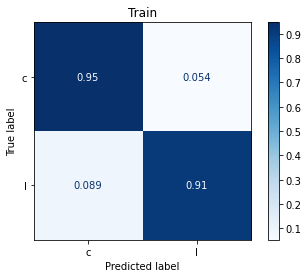

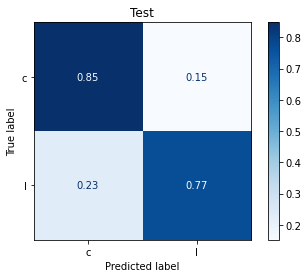

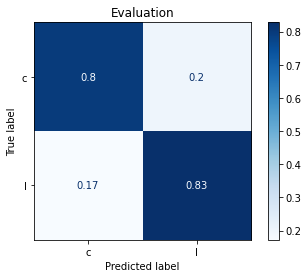

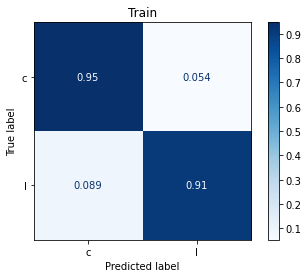

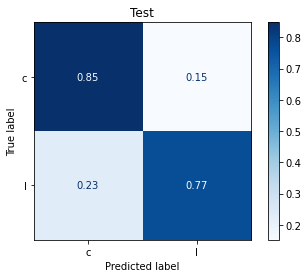

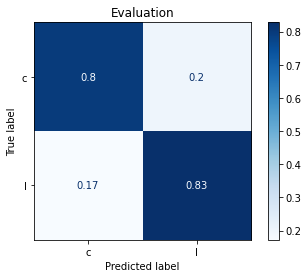

In [42]:
Xs = [X_train, X_test, X_eval]
ys = [y_train, y_test, y_eval]
names = ['Train', 'Test', 'Evaluation']

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    for X, y, name in zip(Xs, Ys, names):
        disp = plot_confusion_matrix(model, X, y,
                                     display_labels="class_names",
                                     cmap=plt.cm.Blues,
                                     normalize='true',
                                    )
        disp.ax_.set_title(name)

        plt.savefig('{}.png'.format(name))